In [1]:
import pandas as pd
from pandas import plotting
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
# from matplotlib import style
%matplotlib inline
# style.use('ggplot')

In [2]:
df = pd.read_csv('PRICES_CPI.csv')
print(df)

    LOCATION        Country   SUBJECT  \
0        USA  United States  CP040000   
1        USA  United States  CP040000   
2        USA  United States  CP040000   
3        USA  United States  CP040000   
4        USA  United States  CP040000   
..       ...            ...       ...   
705      USA  United States  CPGRLH01   
706      USA  United States  CPGRLH01   
707      USA  United States  CPGRLH01   
708      USA  United States  CPGRLH01   
709      USA  United States  CPGRLH01   

                                               Subject MEASURE  \
0    CPI: 04 - Housing, water, electricity, gas and...    IXOB   
1    CPI: 04 - Housing, water, electricity, gas and...    IXOB   
2    CPI: 04 - Housing, water, electricity, gas and...    IXOB   
3    CPI: 04 - Housing, water, electricity, gas and...    IXOB   
4    CPI: 04 - Housing, water, electricity, gas and...    IXOB   
..                                                 ...     ...   
705                         CPI: Services les

In [3]:
columns = df.columns
print(columns)

Index(['LOCATION', 'Country', 'SUBJECT', 'Subject', 'MEASURE', 'Measure',
       'FREQUENCY', 'Frequency', 'TIME', 'Time', 'Unit Code', 'Unit',
       'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')


In [4]:
df.shape

(710, 19)

In [5]:
df.describe()

,TIME,Time,PowerCode Code,Value,Flag Codes,Flags
count,710.000000,710.000000,710.0,710.000000,0.0,0.0
mean,2015.500000,2015.500000,0.0,50.256011,NaN,NaN
std,2.874306,2.874306,0.0,55.104949,NaN,NaN
min,2011.000000,2011.000000,0.0,-16.704100,NaN,NaN
25%,2013.000000,2013.000000,0.0,1.922043,NaN,NaN
50%,2015.500000,2015.500000,0.0,3.614707,NaN,NaN
75%,2018.000000,2018.000000,0.0,100.191025,NaN,NaN
max,2020.000000,2020.000000,0.0,258.811200,NaN,NaN


In [6]:
df['Subject'].to_list()

['CPI: 04 - Housing, water, electricity, gas and other fuels',
 'CPI: 04 - Housing, water, electricity, gas and other fuels',
 'CPI: 04 - Housing, water, electricity, gas and other fuels',
 'CPI: 04 - Housing, water, electricity, gas and other fuels',
 'CPI: 04 - Housing, water, electricity, gas and other fuels',
 'CPI: 04 - Housing, water, electricity, gas and other fuels',
 'CPI: 04 - Housing, water, electricity, gas and other fuels',
 'CPI: 04 - Housing, water, electricity, gas and other fuels',
 'CPI: 04 - Housing, water, electricity, gas and other fuels',
 'CPI: 04 - Housing, water, electricity, gas and other fuels',
 'CPI: 01-12 - All items',
 'CPI: 01-12 - All items',
 'CPI: 01-12 - All items',
 'CPI: 01-12 - All items',
 'CPI: 01-12 - All items',
 'CPI: 01-12 - All items',
 'CPI: 01-12 - All items',
 'CPI: 01-12 - All items',
 'CPI: 01-12 - All items',
 'CPI: 01-12 - All items',
 'CPI: 04 - Housing, water, electricity, gas and other fuels',
 'CPI: 04 - Housing, water, electrici

In [7]:
df['Subject'].value_counts().sort_index()

CPI: 01 - Food and non-Alcoholic beverages                                      40
CPI: 01-12 - All items                                                          40
CPI: 02 - Alcoholic beverages, tobacco and narcotics                            40
CPI: 03 - Clothing and footwear                                                 40
CPI: 04 - Housing, water, electricity, gas and other fuels                      40
CPI: 05 - Furnishings, household equipment and routine household maintenance    40
CPI: 06 - Health                                                                40
CPI: 07 - Transport                                                             40
CPI: 08 - Communication                                                         40
CPI: 09 - Recreation and culture                                                40
CPI: 10 - Education                                                             40
CPI: 11 - Restaurants and hotels                                                40
CPI:

In [9]:
subject_value_time = df[['Subject', 'Value', 'Time']]
print(subject_value_time)

                                               Subject       Value  Time
0    CPI: 04 - Housing, water, electricity, gas and...   91.105120  2011
1    CPI: 04 - Housing, water, electricity, gas and...   92.674420  2012
2    CPI: 04 - Housing, water, electricity, gas and...   94.903620  2013
3    CPI: 04 - Housing, water, electricity, gas and...   97.721720  2014
4    CPI: 04 - Housing, water, electricity, gas and...  100.000000  2015
..                                                 ...         ...   ...
705                         CPI: Services less housing    2.220117  2016
706                         CPI: Services less housing    2.006631  2017
707                         CPI: Services less housing    2.122468  2018
708                         CPI: Services less housing    1.907027  2019
709                         CPI: Services less housing    1.356827  2020

[710 rows x 3 columns]


In [10]:
base_year = subject_value_time.pivot_table(values='Value', index='Time', columns= 'Subject') .sort_index()

In [11]:
base_year.div(base_year.iloc[0])

Subject,CPI: 01 - Food and non-Alcoholic beverages,CPI: 01-12 - All items,"CPI: 02 - Alcoholic beverages, tobacco and narcotics",CPI: 03 - Clothing and footwear,"CPI: 04 - Housing, water, electricity, gas and other fuels","CPI: 05 - Furnishings, household equipment and routine household maintenance",CPI: 06 - Health,CPI: 07 - Transport,CPI: 08 - Communication,CPI: 09 - Recreation and culture,CPI: 10 - Education,CPI: 11 - Restaurants and hotels,CPI: 12 - Miscellaneous goods and services,CPI: All items non-food non-energy,CPI: Energy,CPI: Goods,CPI: Housing,CPI: Services,CPI: Services less housing
Time,,,,,,,,,,,,,,,,,,,
2011,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012,0.999774,1.013624,1.011381,1.052533,1.019335,1.017839,1.024237,0.939781,1.017570,1.016990,1.035694,0.980147,1.046011,1.029758,0.815449,0.959171,1.039001,1.024884,1.017485
2013,0.993121,1.024579,1.036295,1.039738,1.050639,0.993105,1.040602,0.909528,1.017526,1.012576,1.068650,1.016539,1.064307,1.039927,0.789196,0.924384,1.065481,1.052313,1.051621
2014,1.036472,1.042020,1.055483,1.036567,1.087048,0.973217,1.072830,0.888338,1.014314,1.009200,1.098315,1.049912,1.081322,1.057203,0.791017,0.927423,1.094817,1.080731,1.081022
2015,1.033493,1.034024,1.070469,1.011998,1.104910,0.972962,1.103098,0.725914,0.980453,1.010738,1.140355,1.080159,1.113331,1.077505,0.441248,0.834747,1.138641,1.101914,1.071527
2016,0.994932,1.054069,1.100370,1.021749,1.141125,0.957311,1.146730,0.750618,0.986523,1.017936,1.162627,1.105850,1.169511,1.108439,0.531722,0.857675,1.182524,1.138047,1.110106
2017,1.004165,1.081682,1.151007,1.014348,1.185986,0.951186,1.168055,0.824215,0.882504,1.030895,1.183964,1.123175,1.206009,1.120418,0.772902,0.911854,1.220885,1.166824,1.127010
2018,1.015350,1.109700,1.170726,1.024842,1.219226,0.970734,1.185916,0.868149,0.913075,1.023225,1.210099,1.152930,1.249283,1.149710,0.818075,0.941791,1.258649,1.198935,1.152455
2019,1.028607,1.125673,1.214542,1.002779,1.253995,0.999431,1.189691,0.826365,0.915438,1.039080,1.251017,1.191919,1.279901,1.175022,0.675108,0.917942,1.300339,1.229448,1.169106


In [12]:
normalized_data1 = base_year.div(base_year.iloc[0])

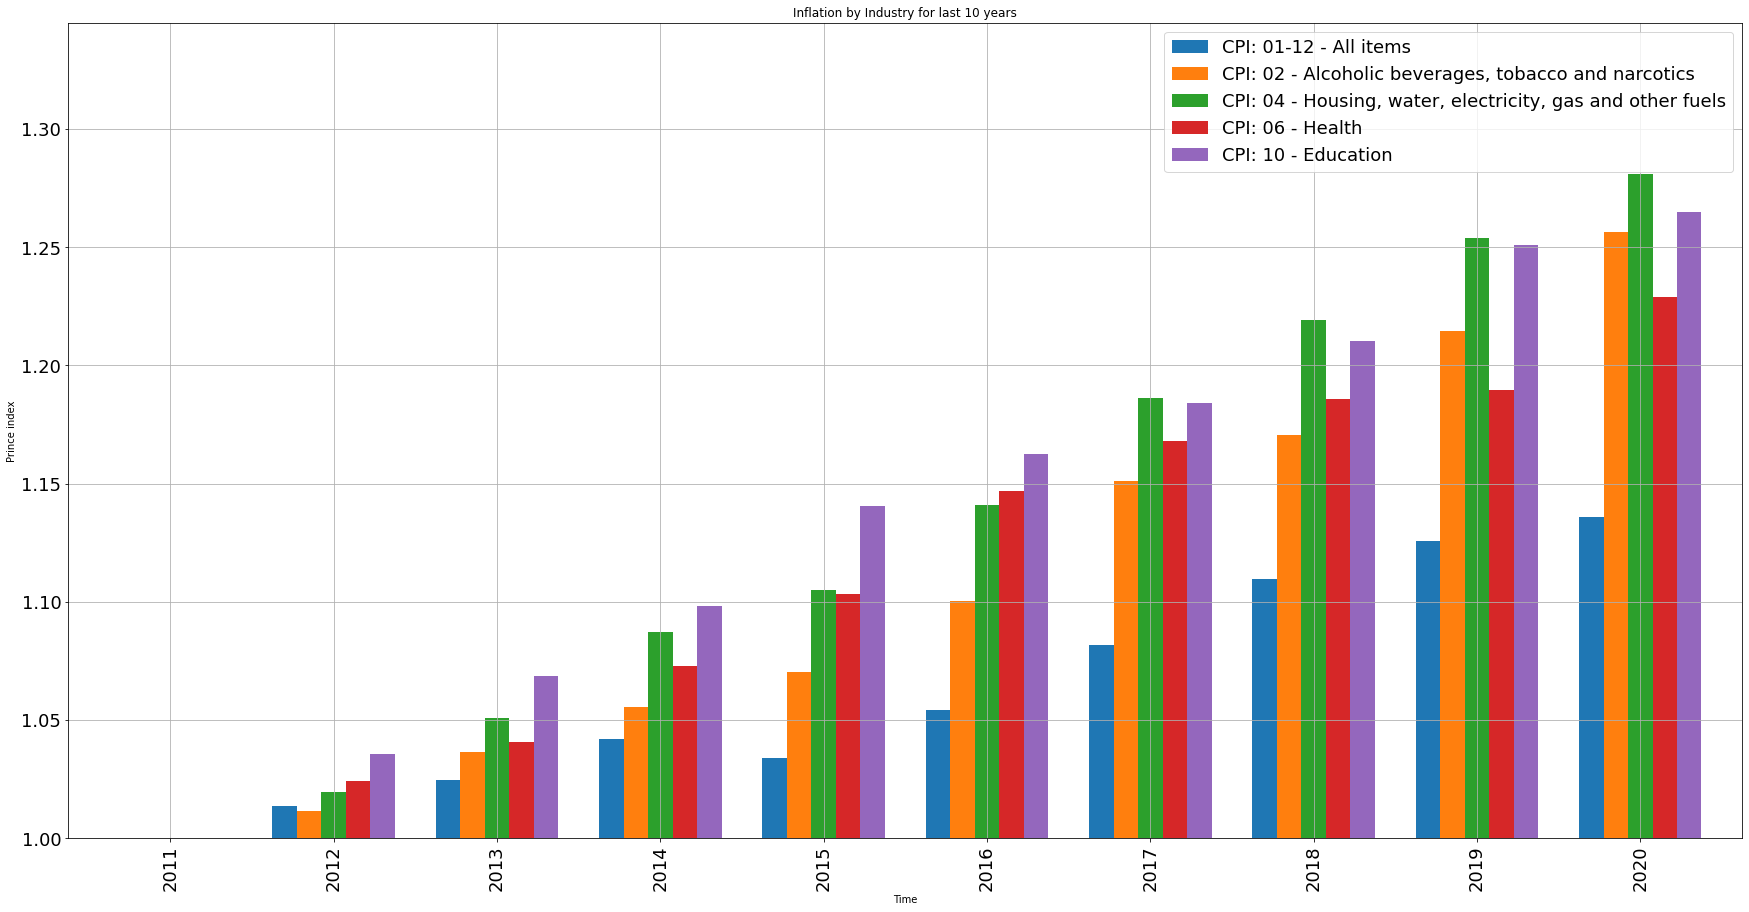

In [13]:
normalized_data1.plot(y=["CPI: 01-12 - All items", "CPI: 02 - Alcoholic beverages, tobacco and narcotics", "CPI: 04 - Housing, water, electricity, gas and other fuels", "CPI: 06 - Health", "CPI: 10 - Education"], kind="bar", grid=True, fontsize=18, figsize=[30, 15], width=0.75)
plt.legend(fontsize = 18)
plt.ylabel('Prince index')
plt.ylim(1.0)
plt.title("Inflation by Industry for last 10 years")
plt.gcf()
plt.savefig("barchart.jpg", bbox_inches='tight')
plt.savefig("barchart.png", bbox_inches='tight')